In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1 Load dataset

In [134]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [135]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [136]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [137]:
type(df), type(df_test)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

# 2 Exploratory feature

In [138]:
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [139]:
for feature  in ['Survived', 'Pclass', 'Sex', 'SibSp', 'Embarked', 'Parch']:
    df[feature] = df[feature].astype('category')
for feature in  ['Pclass', 'Sex', 'SibSp', 'Embarked', 'Parch']:
    df_test[feature] = df_test[feature].astype('category')

In [140]:
df.drop(['PassengerId', 'Ticket'], axis = 1, inplace = True)
df_test.drop(['PassengerId', 'Ticket'], axis = 1, inplace = True)

In [141]:
df.describe(include = 'category')

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


## 2.1 Categorical feature

In [142]:
df['Sex'].value_counts(normalize = True).to_frame()

,proportion
Sex,
male,0.647587
female,0.352413


In [143]:
df['Survived'].value_counts().to_frame()

,count
Survived,
0,549
1,342


<Axes: xlabel='Sex', ylabel='count'>

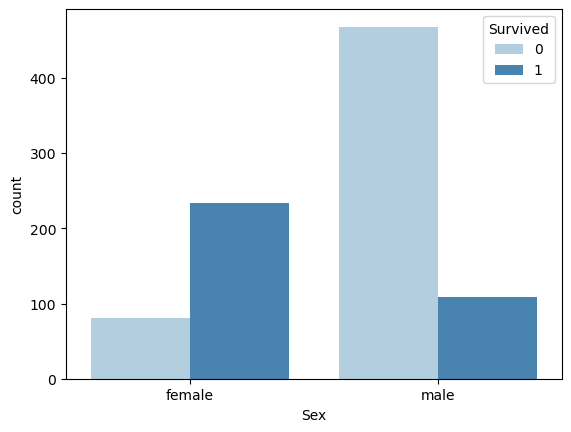

In [144]:
sns.countplot(data = df, x = 'Sex', hue = 'Survived', palette = 'Blues')

In [145]:
categorical_feature = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Embarked']

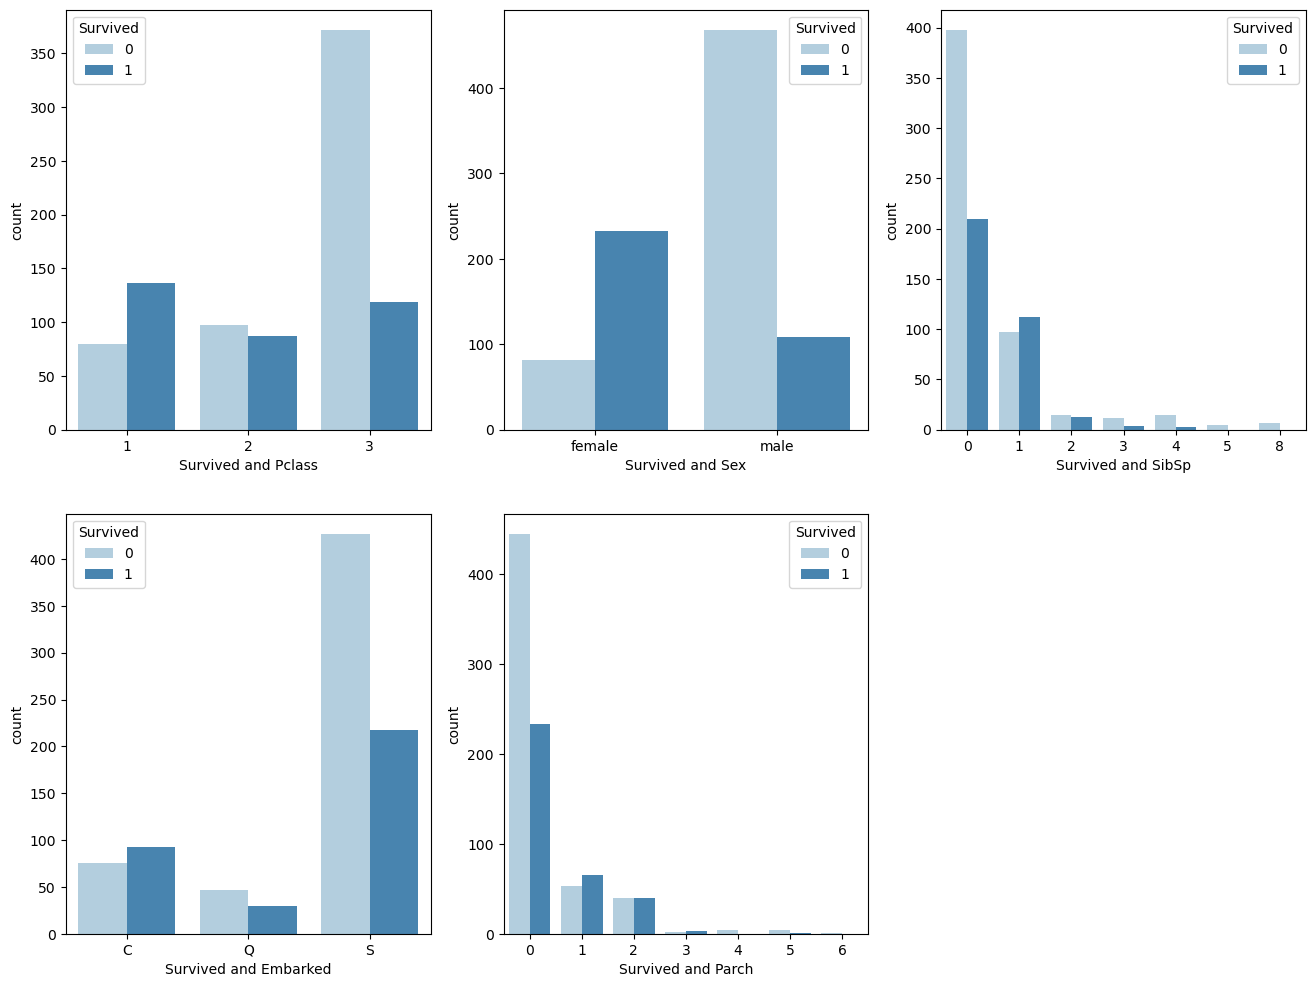

In [146]:
# Draw plot of connections between categorical feature with target feature

fig , axes = plt.subplots(2, 3, figsize = (16,12))
axes = axes.flatten()
for i, feature in  enumerate(['Pclass', 'Sex', 'SibSp', 'Embarked', 'Parch']):
    sns.countplot(data= df, x = feature, hue = 'Survived', palette ='Blues', ax = axes[i])
    axes[i].set_xlabel(f'Survived and {feature}')
axes.flat[-1].set_visible(False)
plt.show()
    



## 2.2 Numerical feauture

In [147]:
df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


<Axes: xlabel='Age', ylabel='Count'>

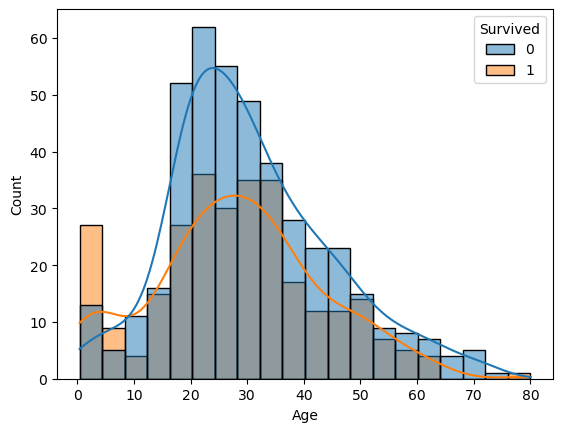

In [148]:
sns.histplot(data = df, x ='Age', hue = 'Survived', kde = True)

<Axes: xlabel='Fare', ylabel='Count'>

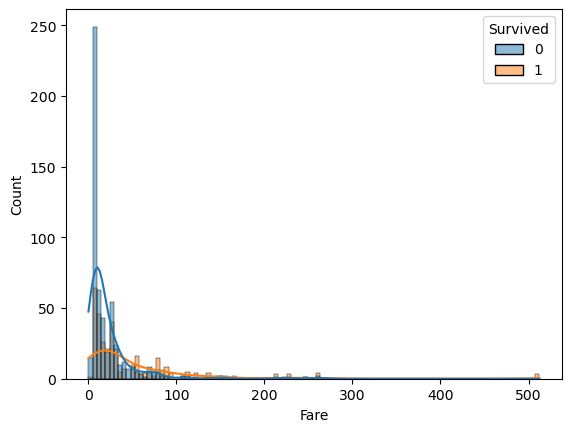

In [149]:
sns.histplot(data = df, x ='Fare', hue = 'Survived', kde = True)

<Axes: xlabel='fare_category', ylabel='count'>

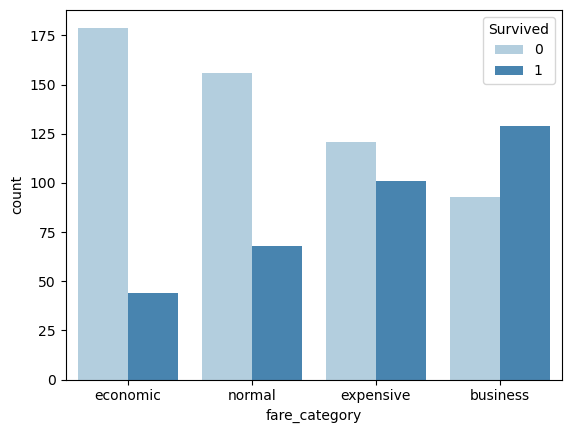

In [150]:
fare_category = ['economic', 'normal', 'expensive', 'business']
data = df.copy()
data['fare_category'] = pd.qcut(data['Fare'], 4, labels = fare_category)
sns.countplot(data = data, x= 'fare_category', hue = 'Survived', palette = 'Blues')

# 3 Feature Engineering

In [151]:
df['family_size'] = df['Parch'].astype('int') + df['SibSp'].astype('int') + 1

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Survived     891 non-null    category
 1   Pclass       891 non-null    category
 2   Name         891 non-null    object  
 3   Sex          891 non-null    category
 4   Age          714 non-null    float64 
 5   SibSp        891 non-null    category
 6   Parch        891 non-null    category
 7   Fare         891 non-null    float64 
 8   Cabin        204 non-null    object  
 9   Embarked     889 non-null    category
 10  family_size  891 non-null    int32   
dtypes: category(6), float64(2), int32(1), object(2)
memory usage: 37.9+ KB


In [153]:
def missing_values(data):
    for feature in data.columns:
        missing_values = data[feature].isnull().sum()
        if missing_values != 0:
            print(f'Column {feature} has {missing_values/len(data)*100:.2f}% missing value')

missing_values(df)

Column Age has 19.87% missing value
Column Cabin has 77.10% missing value
Column Embarked has 0.22% missing value


In [154]:
df['Age'] = df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x : x.fillna(x.median())).reset_index(level = [0,1], drop = True)

<Axes: xlabel='Age', ylabel='Count'>

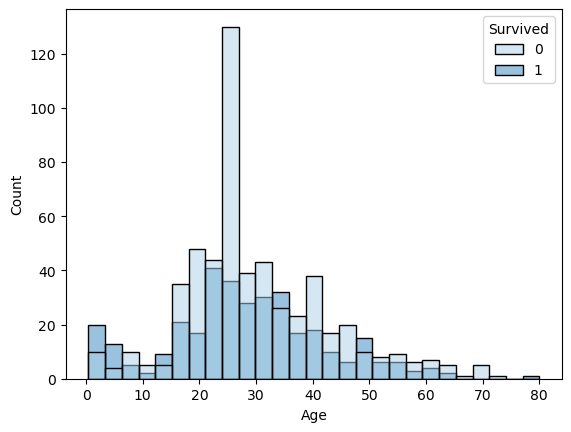

In [155]:
sns.histplot(data = df, x = 'Age', hue = 'Survived', palette = 'Blues' )

In [156]:
df.drop('Cabin', axis = 1, inplace = True)

In [157]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

In [158]:
missing_values(df)

In [159]:
missing_values(df_test)

Column Age has 20.57% missing value
Column Fare has 0.24% missing value
Column Cabin has 78.23% missing value


In [160]:
df_test.drop('Cabin', axis = 1, inplace = True)

In [161]:
df_test['Age'] = df_test.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median())).reset_index(level =[0, 1], drop = True)

In [162]:
df_test['Fare'].fillna(df_test['Fare'].median(), inplace = True)

In [163]:
missing_values(df_test)

# 4 Train model

In [164]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'family_size'],
      dtype='object')

In [165]:
df.describe()

,Age,Fare,family_size
count,891.000000,891.000000,891.000000
mean,29.112424,32.204208,1.904602
std,13.304424,49.693429,1.613459
min,0.420000,0.000000,1.000000
25%,21.500000,7.910400,1.000000
50%,26.000000,14.454200,1.000000
75%,36.000000,31.000000,2.000000
max,80.000000,512.329200,11.000000


In [166]:
numerical_features = ['Age','Fare', 'family_size']
categorical_features = ['Pclass', 'Sex', 'SibSp', 'Parch','Embarked']

In [167]:
my_list = numerical_features + categorical_features
x = df[my_list]
y = df[['Survived']]

In [168]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

num_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown = 'ignore'))
])


preprocessor = ColumnTransformer(transformers = [
    ('num', num_transformer, numerical_features),
    ('cat', cat_transformer, categorical_features)
])

preprocessor.fit(x)
x = preprocessor.transform(x)


In [171]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_val)


                                            



In [172]:
precision_score(y_val, y_pred), recall_score(y_val, y_pred)

(0.7878787878787878, 0.7536231884057971)